In [76]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [77]:
dt=pd.read_csv('results.csv')

In [78]:
dt.head(5)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


the column 'division','overall','genderdiv'  is stand for the participant position in the race based on gender,kind of race.
from the information i found on the internet , bib is the id of participant based on kind of race.
W is for wheelchair. 
F is for female running.
and only number is male running.

In [79]:
dt.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

From the data . i see the time they finish marathon is 'official' column , but it in object format , so i will change it to number . 
i have my focus in 'age' and 'official' and i have a hypothesize that 'official' is different with group of 'age'. 

Change the 'official' type from object to number.

In [80]:
dt['official']=dt['official'].apply(pd.to_numeric, errors = 'coerce')
dt['10k']=dt['10k'].apply(pd.to_numeric, errors = 'coerce')
dt['20k']=dt['20k'].apply(pd.to_numeric, errors = 'coerce')
dt['30k']=dt['30k'].apply(pd.to_numeric, errors = 'coerce')
dt['40k']=dt['40k'].apply(pd.to_numeric, errors = 'coerce')
dt['overall']=dt['overall'].apply(pd.to_numeric, errors = 'coerce')

In [81]:
dt.describe()

,10k,division,age,official,genderdiv,overall,pace,30k,20k,40k
count,31934.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31944.000000,31933.000000,31945.000000
mean,51.799275,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658,164.571219,105.711669,229.001490
std,8.965513,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486,33.953683,19.780525,49.159902
min,16.620000,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000,56.450000,36.100000,76.100000
25%,45.400000,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000,140.670000,91.750000,193.820000
50%,50.330000,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000,157.730000,102.150000,218.850000
75%,57.170000,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000,182.880000,116.520000,257.450000
max,112.380000,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000,376.380000,224.350000,508.350000


From describe table we can clearly see that 75% of participant have age around 50 and the limit age to join the race is above 18 yrs, no upper limit for age <br>
And the count on official is different so i drop all drow have null value in official column. <br>

In [84]:
dt = pd.get_dummies(dt, columns=["gender"])

Transform the data in gender column into one hot encode.

In [85]:
dt.head()

,10k,name,division,25k,age,official,bib,genderdiv,ctz,35k,...,state,30k,5k,half,20k,country,city,40k,gender_F,gender_M
0,17.37,"Yamamoto, Hiroyuki",8,47.67,47,85.25,W1,8,NaN,71.40,...,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43,0,1
1,32.58,"Jeptoo, Rita",1,82.43,33,138.95,F1,1,NaN,116.37,...,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,1,0
2,16.62,"Van Dyk, Ernst F.",1,45.80,41,80.60,W2,1,NaN,67.42,...,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10,0,1
3,32.57,"Dibaba, Mare",3,82.43,24,140.58,F2,3,NaN,116.37,...,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95,1,0
4,17.12,"Hokinoue, Kota",2,46.37,40,81.23,W3,2,NaN,67.83,...,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72,0,1


In [86]:
dt["Disable"]=0

In [87]:
dt["Disable"][(dt['bib'].str.contains('W')==True)]= 1
dt["Disable"][(dt['bib'].str.contains('W')==False)]=0

C:\Users\assas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\assas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Encode the wheelchair participate by 1 and others is 0

In [88]:
dt['Disable'].value_counts()

0    31931
1       53
Name: Disable, dtype: int64

Only 53 people join the wheelchair race .

In [89]:
feature_cols=['Disable','overall','gender_F','gender_M','official','age']
X=dt[feature_cols]
x1 = StandardScaler().fit_transform(X)

Transform the data for calculation. 

In [90]:
print(x1)

[[24.5452989  -1.72553606 -0.90306096  0.90306096 -3.01622335  0.40586707]
 [-0.040741   -1.72412804  1.10734495 -1.10734495 -1.98944711 -0.83128428]
 [24.5452989  -1.72629423 -0.90306096  0.90306096 -3.10513414 -0.12434065]
 ...
 [-0.040741    0.9912896   1.10734495 -1.10734495  0.74575476 -1.89169973]
 [-0.040741    1.24949851  1.10734495 -1.10734495  1.14212481 -0.38944451]
 [-0.040741   -0.11866214 -0.90306096  0.90306096 -0.28102147  1.02444275]]


In [91]:
pca = PCA(n_components=2)
x2 = pca.fit_transform(x1)

reduce the dimension from 

In [92]:
x2

array([[ 5.00235519,  3.7410949 ],
       [ 0.63197393,  3.01029825],
       [ 5.03221964,  4.02987907],
       ...,
       [-2.02664861,  1.02976167],
       [-2.30569657,  0.0304177 ],
       [ 1.14063322, -1.06486059]])

Now i will do and k-mean clustering between 'age' and 'official'
But i want to test the efficiency for different number of clusters , i will use an loop to run k-mean with different number of clusters and choose the best case based on the silhouette score.

###  K-means clustering.

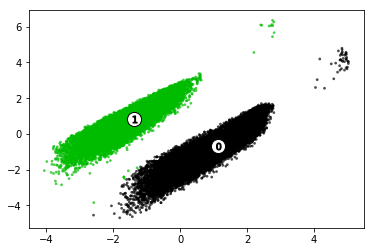

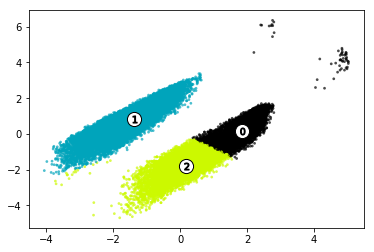

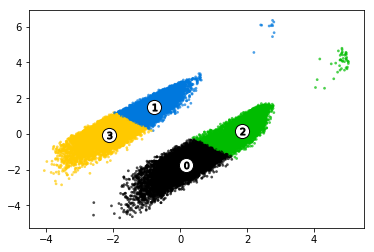

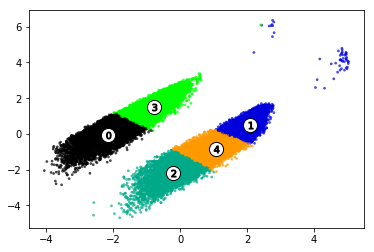

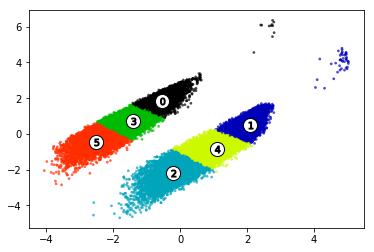

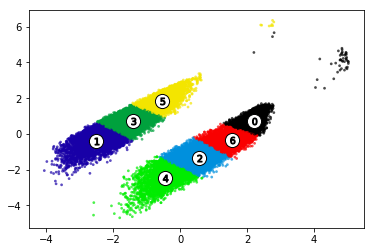

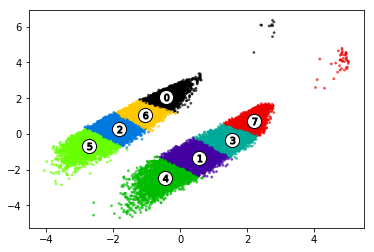

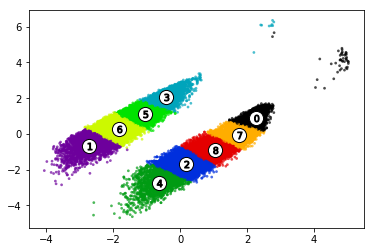

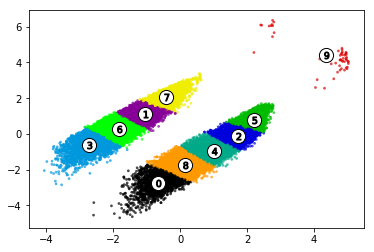

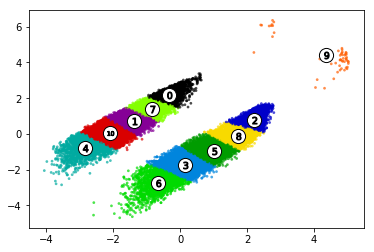

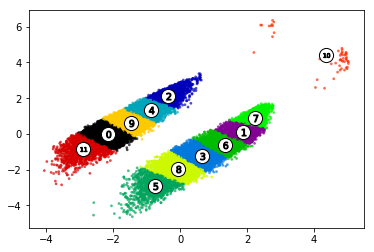

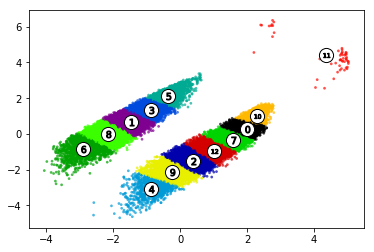

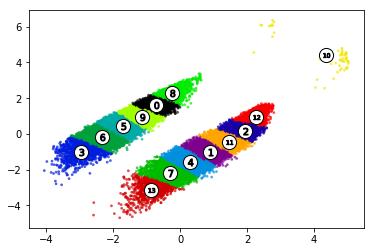

In [93]:
clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14]
a=x2
for number in clusters:
    kmeans = KMeans(number, random_state=0)
    result = kmeans.fit_predict(a)
    fig, (ax2) = plt.subplots(1)
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(result.astype(float) / number)
    ax2.scatter(a[:, 0], a[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')


the silhouette score from sklearn not work so i determine the number of cluster by how it separate by some graph below

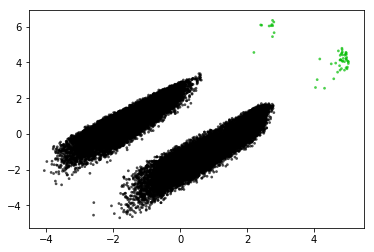

In [94]:
fig, (ax2) = plt.subplots(1)
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(dt['Disable'].astype(float) / 2)
ax2.scatter(a[:, 0], a[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

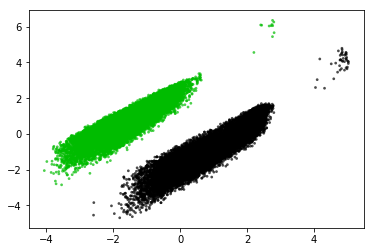

In [95]:
fig, (ax2) = plt.subplots(1)
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(dt['gender_F'].astype(float) / 2)
ax2.scatter(a[:, 0], a[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

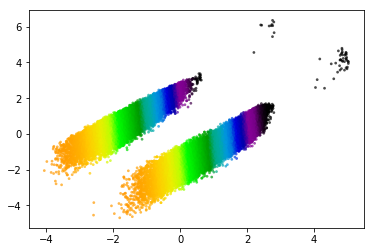

In [96]:
fig, (ax2) = plt.subplots(1)
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(dt['overall'].astype(float)/40000)
ax2.scatter(a[:, 0], a[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

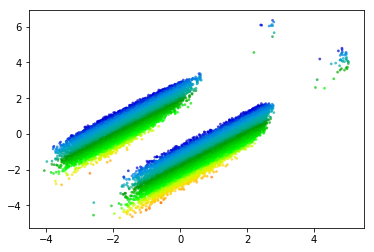

In [97]:
fig, (ax2) = plt.subplots(1)
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(dt['age'].astype(int) / 100)
ax2.scatter(a[:, 0], a[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

As the data express by color above , i can chose the best number of cluster is 10 , because it clearly show the separate data between feature , but it also have weak point is cant not express the age data. <br>
And when i chose 10 cluster , i can separate the wheelchair and others participant , because wheelchair people have high position in overall and genderdiv , they have only 53 participants, if we take them into same cluster as normal people this will effect the median of overall and genderdiv.  <br>
I will run cluster again and see what special with data of each cluster. <br>

In [98]:
kmeans = KMeans(10, random_state=0)
result = kmeans.fit_predict(a)
dt['cluster']=result

In [99]:
b=[0,1,2,3,4,5,6,7,8,9]
for number in b:
    print('number of cluster is:',number)
    print( dt[dt['cluster']==number].describe())

number of cluster is: 0
               10k     division          age     official     genderdiv  \
count  1783.000000  1787.000000  1787.000000  1787.000000   1787.000000   
mean     65.193102  2174.642977    53.520985   339.513005  16468.619474   
std       7.379156  1696.880958    12.078271    34.613430    813.186147   
min      41.780000     2.000000    18.000000   271.380000  13651.000000   
25%      60.325000   919.500000    45.000000   314.970000  15977.500000   
50%      64.550000  1777.000000    55.000000   335.300000  16636.000000   
75%      69.290000  2722.500000    63.000000   359.100000  17127.500000   
max     112.380000  5911.000000    81.000000   538.880000  17575.000000   

            overall         pace          30k          20k          40k  \
count   1787.000000  1787.000000  1781.000000  1780.000000  1768.000000   
mean   29539.231673    12.949804   223.591780   137.458798   319.008676   
std     1697.599335     1.302348    26.250531    16.085916    32.073247   


               10k     division          age     official     genderdiv  \
count  3486.000000  3490.000000  3490.000000  3490.000000   3490.000000   
mean     57.362312  2562.171920    47.626648   279.566266  13998.186246   
std       5.002221  1792.888593    12.491539    22.692580   1369.911110   
min      39.420000     1.000000    18.000000   232.680000  10287.000000   
25%      53.935000  1190.250000    38.000000   262.120000  12970.250000   
50%      57.070000  2188.500000    48.000000   277.670000  14044.500000   
75%      60.620000  4778.750000    58.000000   293.922500  15035.750000   
max      79.670000  5793.000000    81.000000   360.450000  17146.000000   

            overall         pace          30k          20k          40k  \
count   3490.000000  3490.000000  3487.000000  3487.000000  3489.000000   
mean   24360.711175    10.671143   185.306851   117.327746   263.109857   
std     2922.831798     0.865600    16.405872    10.153908    21.970539   
min    16036.000000     

From the data table , i have some comment about each cluster:
Cluster 0,2,4,5,8 is male only and 1,3,6,7 is woman.<br>
Cluster have young participant is 5,7,9. Median for age around 33 yrs.<br>
Cluster have most old male participant is 0. Median for age is 53 yrs , while others cluster have median from 32 to 48.<br>
Male group have most people with high position is 5. It's Genderdiv median is 2226 , other male group >6k<br>
And group 5 also have smallest median of official among male(178)<br>
Female group have most people with high position is 7. It's Genderdiv median is 1909 , others female group >5k<br>
And group 7 also have smallest median of official among female(205)<br>
As we can see the official for male is lower than female.<br>
For men , the slowest running group is 0 , the reason is this group have highest average age so they run slower than young people.<br>
For Woman,  the slowest running group is 3 , and the same as male group , group 3 have highest average age among groups of female(44)<br>